# Heartbeat

This example shows how to use the `BeatData` class to make a dataset for analyzing heartbeats. This class processes the provided ECG records and generates a dataset comprising the extracted heartbeat waveforms, computed features, and their corresponding labels. This type of dataset can be utilized for the heartbeat classification task. For this purpose, any type of machine learning algorithm can be used. The example shows how to include predefined or custom features to the dataset. This requires that an instance of the class `BeatInfo` be passed as an argument.


This example is available on [GitHub](https://github.com/devnums/pyheartlib/blob/main/examples/).

<a target="_blank" href="https://colab.research.google.com/github/devnums/pyheartlib/blob/main/examples/dataset/heartbeat.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install pyheartlib

First, `pyheartlib` needs to be installed.

In [2]:
try:
    import pyheartlib
    print(f'Pyheartlib version {pyheartlib.__version__} is already installed!')
except ModuleNotFoundError:
    print('Installing pyheartlib...')
    %pip install pyheartlib
    import pyheartlib
    print(f'Pyheartlib version {pyheartlib.__version__} is installed!')

Pyheartlib version 1.21.0 is already installed!


## Download raw data

`Pyheartlib` supports the WFDB format. A popular dataset that uses this format is the "MIT-BIH Arrhythmia Database". The code below downloads this dataset and stores it in the data directory.

In [3]:
# Download the raw data and store them in the base data directory
from pathlib import Path
if not Path('data').is_dir():
  print('downloading raw data...')
  import io, zipfile
  from urllib.request import urlopen
  url='https://www.physionet.org/static/published-projects/mitdb/mit-bih-arrhythmia-database-1.0.0.zip'
  with urlopen(url) as rs:
      zipf = zipfile.ZipFile(io.BytesIO(rs.read()))
      zipf.extractall('data/')

  # Create the config file. For this example, it will be download from the original repository
  with urlopen("https://raw.githubusercontent.com/devnums/pyheartlib/main/src/pyheartlib/config.yaml") as file:
      content = file.read().decode()
  with open("data/config.yaml", 'w') as file:
      file.write(content)

## Define objects and features

To create a dataset using the `BeatData`, first it needs to be imported.

```python
from pyheartlib.data_beat import BeatData
```

The next step is to create an object of the `pyheartlib.data_beat.BeatData`. 

```python
beatdata = BeatData(
    base_path="data",
    win=[200, 200],
    remove_bl=False,
    lowpass=False,
    progress_bar=False,
)
```
Descriptions of all the parameters of `BeatData` can be found [here](../introduction.html#directive-bdt).

For feature computation, an instance of the `pyheartlib.beat_info.BeatInfo` has to be created.

```python
from pyheartlib.beat_info import BeatInfo
beatinfo = BeatInfo()
```

`BeatInfo` includes some predefined features, however custom features can also be defined. Each custom feature definition must adhere to this syntax and its name must start with *F_*:

```python
def F_new_feature(self):
    return return_result
```

The `return_result` must be one of the following:
1) A real number.
2) A dictionary such as {"Feature_1": value_1, "Feature_2": value_2}. Each value can be a real number. Alternatively, each value can be a one-dimensional array, list, or tuple. In this case, their elements must correspond to the channels.
3) Tuple or one-dimensional NumPy array. Their elements must correspond to the channels. For example, the return value of `F_feat_new()` as a tuple *(element1, element2)* will produce `F_feat_new(CH1)` for *element1* and `F_feat_new(CH2)` for *element2*. The order of channels is determined by the *CHANNEL* field in the *config.yaml* file.
4) A list. An output as a list will be a list.

The custom features can be added to the beatinfo object by using the `add_features()` method, the list of all available features can be obtained using the `available_features()` method, and to select desired features for computation the `select_features()` method can be used.

Descriptions of all the parameters of `BeatInfo` can be found [here](../introduction.html#directive-bif).


In [4]:
from pyheartlib.data_beat import BeatData

# Make an instance of the BeatData
beatdata = BeatData(
    base_path="data",
    win=[200, 200],
    remove_bl=False,
    lowpass=False,
    progress_bar=False,
)

# Make an instance of the BeatInfo
from pyheartlib.beat_info import BeatInfo
beatinfo = BeatInfo()

# Custom feature.
# This only returns a real value.
# Feature function names has to start with F_.
def F_new_feature1(self):
    return 1.09

# Custom feature.
# This function returns two features.
# The feature are returned as a dictionary.
def F_new_feature2(self):
    post = beatinfo.F_post_rri()
    pre = beatinfo.F_pre_rri()
    ret = {"Post": post, "Pre": pre}
    return ret

# Custom feature.
# The return value of the following function is a one dimensional array:
# array([max_ch1, max_ch2])
import numpy
def F_new_feature3(self):
    # Max value of heartbeat waveform.
    ret = numpy.max(self.bwaveform, axis=0)
    return ret

# Custom feature.
# This feature returns the segmented heartbeat waveform.
# bwaveform is an attribute and is computed according to the pre and post RR intervals.
def F_new_feature4(self):
    wf = numpy.swapaxes(beatinfo.bwaveform, 0, 1)
    return list(wf)

# Add custom features to the beatinfo object
new_features = [F_new_feature1, F_new_feature2, F_new_feature3, F_new_feature4]
beatinfo.add_features(new_features)

# Get a list of available feature functions which include predefined and custom features
print(beatinfo.available_features())

['F_absmean_sdrri', 'F_beat_kurtosis', 'F_beat_max', 'F_beat_mean', 'F_beat_min', 'F_beat_rms', 'F_beat_skewness', 'F_beat_std', 'F_compensate_diff_nr', 'F_compensate_ratio', 'F_diff_post_avg_nr', 'F_diff_post_pre', 'F_diff_post_pre_nr', 'F_diff_pre_avg_nr', 'F_fft_features', 'F_heart_rate', 'F_maxmin_diff', 'F_maxmin_diff_norm', 'F_mean_pre_rri', 'F_mean_pre_sdrri', 'F_mean_sdrri', 'F_median_rri', 'F_new_feature1', 'F_new_feature2', 'F_new_feature3', 'F_new_feature4', 'F_nsampels', 'F_post_rri', 'F_pre_rri', 'F_ratio_post_pre', 'F_ratio_post_rms', 'F_ratio_pre_rms', 'F_rms_rri', 'F_rms_sdrri', 'F_std_rri', 'F_std_sdrri']


In [5]:
# Select the desired features
beatinfo.select_features(
    ["F_beat_max", "F_beat_skewness", "F_new_feature1", "F_new_feature2", "F_new_feature3", "F_new_feature4"]
)

### Create inter-patient dataset

Finally, using the `save_dataset_inter()` method of `BeatData`, an inter-patient dataset can be created.

In [6]:
# Use the save_dataset_inter method to create an inter-patient dataset.
# The file will be saved in the base data directory.
beatdata.save_dataset_inter(["209"], beatinfo, file="train.beat")

# In a similar way for validation and test datasets
beatdata.save_dataset_inter(["215", "220"], beatinfo, file="val.beat")
beatdata.save_dataset_inter(["111"], beatinfo, file="test.beat")

File saved at: data/train.beat
File saved at: data/val.beat
File saved at: data/test.beat


In [7]:
# Load the datasets
train_ds = beatdata.load_data(file_name="train.beat")
val_ds = beatdata.load_data(file_name="val.beat")
test_ds = beatdata.load_data(file_name="test.beat")

File loaded from: data/train.beat
-Shape of "waveforms" is (2985, 400, 2). Number of samples is 2985.
-Shape of "beat_feats" is (2985, 10). Number of samples is 2985.
-Shape of "labels" is (2985,). Number of samples is 2985.
               N  L  R  j  e  V  E    A  S  a  J  F  f  /  Q
train.beat  2601  0  0  0  0  1  0  383  0  0  0  0  0  0  0



File loaded from: data/val.beat
-Shape of "waveforms" is (5371, 400, 2). Number of samples is 5371.
-Shape of "beat_feats" is (5371, 10). Number of samples is 5371.
-Shape of "labels" is (5371,). Number of samples is 5371.
             N  L  R  j  e    V  E   A  S  a  J  F  f  /  Q
val.beat  5109  0  0  0  0  164  0  97  0  0  0  1  0  0  0

File loaded from: data/test.beat
-Shape of "waveforms" is (2104, 400, 2). Number of samples is 2104.
-Shape of "beat_feats" is (2104, 10). Number of samples is 2104.
-Shape of "labels" is (2104,). Number of samples is 2104.
           N     L  R  j  e  V  E  A  S  a  J  F  f  /  Q
test.beat  0  2103  0  0  0  1  0  0  0  0  0  0  0  0  0



Length of waveform: 232


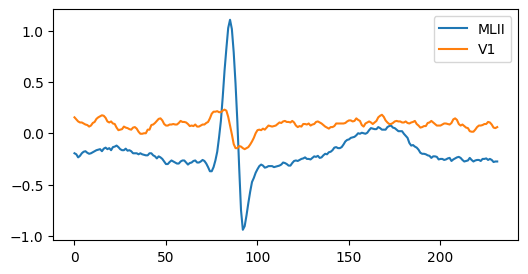

In [8]:
# Plot a hearbeat waveform
wf = train_ds["beat_feats"]["F_new_feature4"][0]
wf_ch1 = wf[0]
wf_ch2 = wf[1]
print(f'Length of waveform: {len(wf_ch1)}')

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(wf_ch1);
plt.plot(wf_ch2);
chs = beatdata.config["CHANNEL"]
plt.legend([chs[0], chs[1]], loc="upper right");

In [9]:
# Number of samples per class
stat_report = beatdata.report_stats_table(
    [train_ds["labels"], val_ds["labels"], test_ds["labels"]], ["Train", "Val", "Test"]
)
print(stat_report)

          N     L  R  j  e    V  E    A  S  a  J  F  f  /  Q
Train  2601     0  0  0  0    1  0  383  0  0  0  0  0  0  0
Val    5109     0  0  0  0  164  0   97  0  0  0  1  0  0  0
Test      0  2103  0  0  0    1  0    0  0  0  0  0  0  0  0


In [10]:
print(train_ds["beat_feats"].tail(3))
# The Post and Pre columns are the results of F_new_feature2

      F_beat_max(CH1)  F_beat_max(CH2)  F_beat_skewness(CH1)  \
2982            1.250            0.225              2.189705   
2983            1.355            0.290              1.755593   
2984            1.420            0.210              2.580627   

      F_beat_skewness(CH2)  F_new_feature1        Post         Pre  \
2982             -2.138954            1.09  641.666667  663.888889   
2983             -1.726974            1.09  494.444444  641.666667   
2984             -1.694141            1.09  761.111111  494.444444   

      F_new_feature3(CH1)  F_new_feature3(CH2)  \
2982                1.250                0.225   
2983                1.355                0.290   
2984                1.420                0.210   

                                         F_new_feature4  
2982  [[-0.19, -0.2, -0.2, -0.19, -0.17, -0.17, -0.1...  
2983  [[-0.015, -0.025, -0.04, -0.03, -0.025, -0.015...  
2984  [[0.135, 0.15, 0.135, 0.125, 0.1, 0.115, 0.135...  


### Create intra-patient dataset

To create an intra-patient dataset, the `save_dataset_intra` method can be used.

In [11]:
# Use the save_dataset_intra method to create an intra-patient dataset.
# The file will be saved in the base data directory.
beatdata.save_dataset_intra([209, 215], beatinfo)

# Load datasets
train_ds = beatdata.load_data(file_name="intra_train.beat")
test_ds = beatdata.load_data(file_name="intra_test.beat")

File saved at: data/intra_train.beat
File saved at: data/intra_test.beat
File loaded from: data/intra_train.beat
-Shape of "waveforms" is (1897, 400, 2). Number of samples is 1897.
-Shape of "beat_feats" is (1897, 10). Number of samples is 1897.
-Shape of "labels" is (1897,). Number of samples is 1897.
                     N  L  R  j  e   V  E   A  S  a  J  F  f  /  Q
intra_train.beat  1781  0  0  0  0  57  0  59  0  0  0  0  0  0  0

File loaded from: data/intra_test.beat
-Shape of "waveforms" is (4431, 400, 2). Number of samples is 4431.
-Shape of "beat_feats" is (4431, 10). Number of samples is 4431.
-Shape of "labels" is (4431,). Number of samples is 4431.
                    N  L  R  j  e    V  E    A  S  a  J  F  f  /  Q
intra_test.beat  3995  0  0  0  0  108  0  327  0  0  0  1  0  0  0



In [12]:
# Number of samples per class
stat_report = beatdata.report_stats_table(
    [train_ds["labels"], test_ds["labels"]], ["Train", "Test"]
)
print(stat_report)

          N  L  R  j  e    V  E    A  S  a  J  F  f  /  Q
Train  1781  0  0  0  0   57  0   59  0  0  0  0  0  0  0
Test   3995  0  0  0  0  108  0  327  0  0  0  1  0  0  0


In [13]:
print(train_ds['beat_feats'].tail(3))
# The Post and Pre columns are the results of F_new_feature2

      F_beat_max(CH1)  F_beat_max(CH2)  F_beat_skewness(CH1)  \
999             0.885            0.245              1.090895   
1000            0.710            0.270              0.565561   
1001            0.650            0.220              0.376462   

      F_beat_skewness(CH2)  F_new_feature1        Post         Pre  \
999              -3.074383            1.09  583.333333  555.555556   
1000             -2.327165            1.09  550.000000  583.333333   
1001             -1.794805            1.09  566.666667  550.000000   

      F_new_feature3(CH1)  F_new_feature3(CH2)  \
999                 0.885                0.245   
1000                0.710                0.270   
1001                0.650                0.220   

                                         F_new_feature4  
999   [[-0.125, -0.11, -0.085, -0.09, -0.12, -0.14, ...  
1000  [[-0.12, -0.135, -0.135, -0.135, -0.13, -0.125...  
1001  [[-0.135, -0.125, -0.11, -0.13, -0.135, -0.165...  
